# Optional Lab: Model Representation

<figure>
 <img src="./images/C1_W1_L3_S1_Lecture_b.png"   style="width:600px;height:200px;">
</figure>

## Goals
In this lab you will:
- Learn to implement the model $f_{w,b}$ for linear regression with one variable

## Notation
Here is a summary of some of the notation you will encounter.  

|General <img width=70/> <br />  Notation  <img width=70/> | Description<img width=350/>| Python (if applicable) |
|: ------------|: ------------------------------------------------------------||
| $a$ | scalar, non bold                                                      ||
| $\mathbf{a}$ | vector, bold                                                      ||
| **Regression** |         |    |     |
|  $\mathbf{x}$ | Training Example feature values (in this lab - Size (1000 sqft))  | `x_train` |   
|  $\mathbf{y}$  | Training Example  targets (in this lab Price (1000s of dollars))  | `y_train` 
|  $x^{(i)}$, $y^{(i)}$ | $i_{th}$Training Example | `x_i`, `y_i`|
| m | Number of training examples | `m`|
|  $w$  |  parameter: weight                                 | `w`    |
|  $b$           |  parameter: bias                                           | `b`    |     
| $f_{w,b}(x^{(i)})$ | The result of the model evaluation at $x^{(i)}$ parameterized by $w,b$: $f_{w,b}(x^{(i)}) = wx^{(i)}+b$  | `f_wb` | 


## Tools
In this lab you will make use of: 
- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data

In [22]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

# Problem Statement
<img align="left" src="./images/C1_W1_L3_S1_trainingdata.png"    style=" width:380px; padding: 10px;  " /> 

As in the lecture, you will use the motivating example of housing price prediction.  
This lab will use a simple data set with only two data points - a house with 1000 square feet(sqft) sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000. These two points will constitute our *data or training set*. In this lab, the units of size are 1000 sqft and the units of price are 1000s of dollars.

| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1.0               | 300                      |
| 2.0               | 500                      |

You would like to fit a linear regression model (shown above as the blue straight line) through these two points, so you can then predict price for other houses - say, a house with 1200 sqft.


Please run the following code cell to create your `x_train` and `y_train` variables. The data is stored in one-dimensional NumPy arrays.

In [23]:
# x_train is the input variable (size in 1000 square feet)
# y_train is the target (price in 1000s of dollars)
import numpy as np  ##导入 NumPy 库，用于创建和操作数组。
import matplotlib.pyplot as plt  ##导入 Matplotlib 库的 pyplot 模块，用于数据可视化。
plt.style.use('./deeplearning.mplstyle')  ##设置 Matplotlib 图形的样式，使用了一个名为 "deeplearning.mplstyle" 的样式文件。
x_train = np.array([1.0, 2.0,[3,4]])  
y_train = np.array([300.0, 500.0])
##创建了两个 NumPy 数组 x_train 和 y_train，分别表示输入变量和目标变量。这里使用了 np.array() 函数将列表转换为 NumPy 数组。

z_train = np.array([[23, 45, -89],[1,2,3],[5,6,7],[8,9,10]])
# z_train = np.array([[23, 45, -89],[1,2,3],[5,6,7,8]])
##创建了另一个 NumPy 数组 z_train。这是一个二维数组，其中包含了多个列表，每个列表的长度不一样。
##这种不规则的二维数组在 NumPy 中通常被称为“嵌套列表”或“不均匀数组”。

print(f"x_train is:{x_train}")

print(f"y_train = {y_train}")

print(f"z_train = {z_train}")
##打印了三个数组的内容。使用了格式化字符串，{} 中的内容会被对应的变量值替换。

print(f'lenth of z_train= {z_train.shape}')
##打印了数组 z_train 的形状（shape），即其行数和列数。.shape 是 NumPy 数组的属性，用于获取数组的形状信息。

##总的来说，这段代码主要是演示了如何创建和使用 NumPy 数组，以及打印数组的内容和形状信息。

x_train is:[1.0 2.0 list([3, 4])]
y_train = [300. 500.]
z_train = [[ 23  45 -89]
 [  1   2   3]
 [  5   6   7]
 [  8   9  10]]
lenth of z_train= (4, 3)


>**Note**: The course will frequently utilize the python 'f-string' output formatting described [here](https://docs.python.org/3/tutorial/inputoutput.html) when printing. The content between the curly braces is evaluated when producing the output.

### Number of training examples `m`
You will use `m` to denote the number of training examples. Numpy arrays have a `.shape` parameter. `x_train.shape` returns a python tuple with an entry for each dimension. `x_train.shape[0]` is the length of the array and number of examples as shown below.

In [24]:
# m is the number of training examples
m = x_train.shape[0]
print(f"Number of training examples is: {m}")
k = z_train.shape
print(f"Number of training examples is: {k}")

Number of training examples is: 3
Number of training examples is: (4, 3)


One can also use the Python `len()` function as shown below.

In [20]:
# m is the number of training examples
m = len(x_train)
print(f"Number of training examples is: {m}")
n = len(z_train)
print(f"Number of training examples is: {n}")
k = len(y_train)
print(f"Number of training examples is: {k}")

Number of training examples is: 3
Number of training examples is: 4
Number of training examples is: 2


## python len输出函数与.shape有什么不同？
在 Python 中，`len()` 函数和 `.shape` 属性用于获取序列的长度或者数组的形状，但是它们的使用方式和适用范围有所不同。

1. `len()` 函数：
   - 适用范围：`len()` 函数适用于任何序列类型，例如列表、元组、字符串等。
   - 功能：`len()` 函数返回序列中元素的数量，即序列的长度。
   - 示例：
     ```python
     my_list = [1, 2, 3, 4, 5]
     print(len(my_list))  # 输出结果为 5
     ```

2. `.shape` 属性：
   - 适用范围：`.shape` 属性通常用于 NumPy 数组或者其他类似的多维数组类型。
   - 功能：`.shape` 属性返回数组的形状信息，即数组的维度和每个维度的大小。
   - 示例：
     ```python
     import numpy as np
     my_array = np.array([[1, 2, 3], [4, 5, 6]])
     print(my_array.shape)  # 输出结果为 (2, 3)，表示数组有2行3列
     ```

综上所述，`len()` 函数用于获取任何序列类型的长度，而 `.shape` 属性通常用于获取多维数组的形状信息。在处理数组时，推荐使用 `.shape` 属性来获取数组的形状，而在处理列表、元组等序列类型时，则使用 `len()` 函数来获取长度。

### Training example `x_i, y_i`

You will use (x$^{(i)}$, y$^{(i)}$) to denote the $i^{th}$ training example. Since Python is zero indexed, (x$^{(0)}$, y$^{(0)}$) is (1.0, 300.0) and (x$^{(1)}$, y$^{(1)}$) is (2.0, 500.0). 

To access a value in a Numpy array, one indexes the array with the desired offset. For example the syntax to access location zero of `x_train` is `x_train[0]`.
Run the next code block below to get the $i^{th}$ training example.

(x^(0), y^(0)) = (1.0, 300.0)
(x^(0), z^(0)) = (1.0, [23, 45, -89])
(y^(0), z^(0)) = (300.0, [23, 45, -89])
(x^(1), y^(1)) = (2.0, 500.0)
(x^(1), z^(1)) = (2.0, [1, 2, 3])
(y^(1), z^(1)) = (500.0, [1, 2, 3])
(3,)


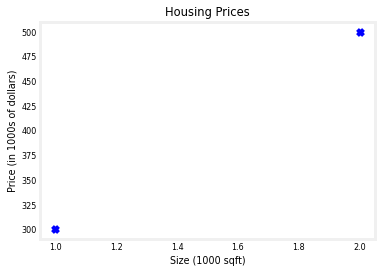

In [25]:
for i in range(len(y_train)):
    ##这是一个 for 循环，它遍历了训练集中目标变量 y_train 的索引。
    ##range(len(y_train)) 生成一个包含训练集样本数量的索引范围，从 0 到 len(y_train)-1
    ##如果我想让range从索引1开始循环，即：for i in range(1, len(y_train)):
    
# i = 1 # Change this to 1 to see (x^1, y^1)

    x_train = np.array([1.0, 2.0])  
    y_train = np.array([300.0, 500.0])
    z_train = np.array([[23, 45, -89],[1,2,3],[5,6,7,8]])

    x_i = x_train[i]
    y_i = y_train[i]
    z_i = z_train[i]
    print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")
    print(f"(x^({i}), z^({i})) = ({x_i}, {z_i})")
    print(f"(y^({i}), z^({i})) = ({y_i}, {z_i})")
    plt.scatter(x_i, y_i, marker='x', c='b') # c = color
    # Plot the data points

print(z_train.shape)
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

### Plotting the data

You can plot these two points using the `scatter()` function in the `matplotlib` library, as shown in the cell below. 
- The function arguments `marker` and `c` show the points as red crosses (the default is blue dots).

You can use other functions in the `matplotlib` library to set the title and labels to display

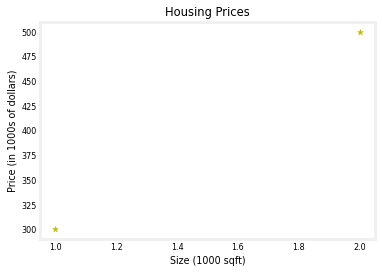

In [6]:
import matplotlib.pyplot as plt
# Plot the data points
plt.scatter(x_train, y_train, marker='*', c='y')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

## Model function

<img align="left" src="./images/C1_W1_L3_S1_model.png"     style=" width:380px; padding: 10px; " > As described in lecture, the model function for linear regression (which is a function that maps from `x` to `y`) is represented as 

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot. <br/> <br/> <br/> <br/> <br/> 

Let's try to get a better intuition for this through the code blocks below. Let's start with $w = 100$ and $b = 100$. 

**Note: You can come back to this cell to adjust the model's w and b parameters**

In [29]:
w = 100
b = 100
print(f"w:",w)
print(f"b: {b}")

w: 100
b: 100


Now, let's compute the value of $f_{w,b}(x^{(i)})$ for your two data points. You can explicitly write this out for each data point as - 

for $x^{(0)}$, `f_wb = w * x[0] + b`

for $x^{(1)}$, `f_wb = w * x[1] + b`

For a large number of data points, this can get unwieldy and repetitive. So instead, you can calculate the function output in a `for` loop as shown in the `compute_model_output` function below.
> **Note**: The argument description `(ndarray (m,))` describes a Numpy n-dimensional array of shape (m,). `(scalar)` describes an argument without dimensions, just a magnitude.  
> **Note**: `np.zero(n)` will return a one-dimensional numpy array with $n$ entries   


In [36]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      f_wb (ndarray (m,)): model prediction
    """
    w=200
    b=100
    m = x.shape[0]
    print("m:",m)
    f_wb = np.zeros(m)
    print(f_wb)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

Now let's call the `compute_model_output` function and plot the output..

m: 2
[0. 0.]


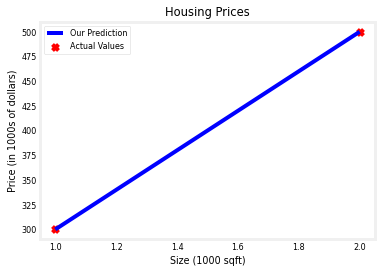

In [37]:
tmp_f_wb = compute_model_output(x_train, w, b,)
# x_train = np.array([1.0, 2.0])
# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')


# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()


As you can see, setting $w = 100$ and $b = 100$ does *not* result in a line that fits our data. 

### Challenge
Try experimenting with different values of $w$ and $b$. What should the values be for a line that fits our data?

#### Tip:
You can use your mouse to click on the green "Hints" below to reveal some hints for choosing b and w.

<details>
<summary>
    <font size='3', color='darkgreen'><b>Hints</b></font>
</summary>
    <p>
    <ul>
        <li>Try $w = 200$ and $b = 100$ </li>
    </ul>
    </p>

### Prediction
Now that we have a model, we can use it to make our original prediction. Let's predict the price of a house with 1200 sqft. Since the units of $x$ are in 1000's of sqft, $x$ is 1.2.


In [38]:
w = 200                         
b = 100    
x_i = 1.2
cost_1200sqft = w * x_i + b    

print(f"${cost_1200sqft:.0f} thousand dollars")

$340 thousand dollars


# Congratulations!
In this lab you have learned:
 - Linear regression builds a model which establishes a relationship between features and targets
     - In the example above, the feature was house size and the target was house price
     - for simple linear regression, the model has two parameters $w$ and $b$ whose values are 'fit' using *training data*.
     - once a model's parameters have been determined, the model can be used to make predictions on novel data.

## 其他问题：

基本上是这样的，不过我需要指出一些修正：

    NumPy不是计算器，而是Python的一个科学计算库，它提供了高性能的多维数组对象以及用于处理这些数组的各种函数。Matplotlib也不是计算器，它是Python的一个用于绘制图表的库。

    代码的主要内容是：

        导入NumPy和Matplotlib库；
        定义原始数据 x 和 y，并计算数据总量 m；
        可视化原始数据；
        定义线性回归模型函数；
        通过调整模型参数进行预测，并可视化结果。
代码中并没有直接进行数值计算或者可视化的操作，而是主要是数据的准备、模型的定义和预测，以及结果的展示。

函数就是线性回归的那根线的值。
我们是要在算出大致正确的函数后，才能对其他数值进行预测？
    
    是的，对于线性回归模型，首先需要通过训练数据拟合出一个合适的模型，即找到合适的权重和偏置参数，使得模型能够较好地拟合训练数据。一旦得到了合适的模型，就可以用这个模型来对新的输入数据进行预测，从而得到预测结果。

[0. 0.]


<function matplotlib.pyplot.show(*args, **kw)>

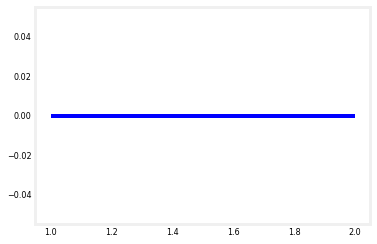